In [1]:
import sys
sys.path.append('../dataset/')
from utils import get_paths_from_dirs
import shutil
from dataset import load_img, Bbox
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
paths = get_paths_from_dirs(['/home/office/kirilman/Projects/asbestos/270421/'],['bmp'])
print(len(paths))
paths[-3:]

462


[PosixPath('/home/office/kirilman/Projects/asbestos/270421/3/AutoScan_27-04-2021-15-28-45/Detailed/27-04-2021-15-32-00_15_3_66_detailed.bmp'),
 PosixPath('/home/office/kirilman/Projects/asbestos/270421/3/AutoScan_27-04-2021-15-28-45/Detailed/27-04-2021-15-30-18_4_3_79_detailed.bmp'),
 PosixPath('/home/office/kirilman/Projects/asbestos/270421/3/AutoScan_27-04-2021-15-28-45/Detailed/27-04-2021-15-33-00_21_3_72_detailed.bmp')]

In [54]:
!mkdir ../../temp_set
!ls ../../

mkdir: cannot create directory ‘../../temp_set’: File exists
 270421
 270421.tar
 src
'task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)'
'task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0'
 temp_set
 temp_set1


In [27]:
for p in paths:
    shutil.copy2(p,'../../temp_set/')

In [5]:
class Label:
    def __init__(self, path2label):
        self.path = path2label
#         self.img  = load_img(path2label, float)
        self.name = Path(path2label).root
        self._read_bboxs()
    def path(self):
        return self.path
    
    def _read_bboxs(self):
        self.bboxs = []
        with open(self.path, 'r') as f:
            page = f.read()
            for line in page.split('\n'):
                if len(line) <= 1:
                    continue
                c,x1,y1,x2,y2 = line.split(' ')
                self.bboxs.append(Bbox(float(x1),float(y1),float(x2),float(y2)))
#         print("Reading {} bboxs from {}".format(len(self.bboxs), self.path))
                    
    def bboxs(self):
        return self.bboxs
    
test_labels = get_paths_from_dirs(['../notebooks/yolor/open_pit_set-2/test/labels/'],['txt'])
# test_labels = get_paths_from_dirs(['../notebooks/yolov5/runs/detect/exp6/labels'],['txt'])

print(len(test_labels))
with open(test_labels[25],'r') as f:
    page = f.read()

74


In [6]:
diags = []
for f in test_labels:
    label = Label(f)
    if len(label.bboxs)<1: continue
    for bbox in label.bboxs:
        if bbox.diagonal > 1:
#             print(bbox.x1, bbox.y1, bbox.x2, bbox.y2)
            pass
        diags.append(bbox.diagonal)

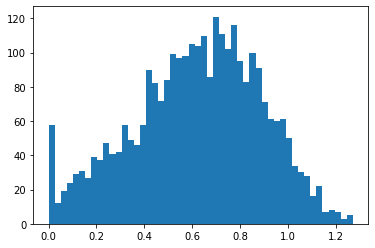

In [7]:
plt.hist(diags,50);

In [110]:
x1 = 0
x2 = 1
y1 = 0
y2 = 1
b1 = Bbox(x1,y1,x2,y2)
b1.diagonal

1.4142135623730951

In [111]:
import numpy as np
np.sqrt((0.1-0.9)**2 + (0.81 - 0.1)**2)

1.0696261028976435